In [0]:
#Imports for the various packages used within this report.

from tweepy import API   
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

from textblob import TextBlob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

#API Access keys provided by a Twitter developer account

CONSUMER_KEY = 'VTBhBeTNam8f6ICjHwoKUfZBl'
CONSUMER_SECRET = 'bodkyhmxWRZh6AA8L3SXiZz8smYNegfPn97vMeY1j93jbgDrY9'
OAUTH_TOKEN = '1225065976640737280-dXTLnXTDWZInyxgrnXiPDVaZZ2VNFQ'
OAUTH_TOKEN_SECRET = 'GWZNc1vHT3i73u2ErAXI3p2uJdWyuCwooBlabw2IxRJsM'

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#Gives Access to the twitter client through the API
class Client():
    def __init__(self, twitter_user=None):
        self.auth = Authenticator().authenticate_twitter_app()
        self.Client = API(self.auth)

        self.twitter_user = twitter_user

    def get_Client_api(self):
        return self.Client

#Provides authorisation via developer account keys for Twitter API
class Authenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
        return auth

#Cleans the tweets via various actions before returning tweets in a dataframe that can be analysed
class Analyser():

    def clean_tweet(self, tweet):
        tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
        tokens = word_tokenize(tweet)
        tokens = [w.lower() for w in tokens]
        table = str.maketrans('','', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words]
        porter = PorterStemmer()
        words = [porter.stem(word) for word in words]
        tweet = ' '.join(word for word in words)

        return tweet

    def trends_to_data_frame(self,tweets):

      UK_Trends = tweets[0]["trends"][:20]

      df = pd.DataFrame(UK_Trends)
      return df

#Calls the aforementioned functions
if __name__ == '__main__':
    twitter_client = Client()
    tweet_analyser = Analyser()

    api = twitter_client.get_Client_api()
#Input for the functions. 12723 is the UK ID for Twitter. 
    tweets = api.trends_place(12723)
    
    df = tweet_analyser.trends_to_data_frame(tweets)
    # removes rows with missing values if required
    df1 = df[df['tweet_volume'].notna()]
    #sorts dataframe by user inputted value
    df2 = df1.sort_values(by = 'tweet_volume', ascending= False)
    print(df2)

#Prints extended version of dataframe    
df2

                 name  ... tweet_volume
18               day6  ...    1233562.0
1            #COVID19  ...     993499.0
0             England  ...     179357.0
9        #InsecureHBO  ...     153903.0
7       Jerry Stiller  ...     124072.0
4   #MondayMotivation  ...      61889.0
6          Afronation  ...      42939.0
8                Raab  ...      42092.0
5        Piers Morgan  ...      30246.0
3        #thanksboris  ...      25834.0

[10 rows x 5 columns]


,name,url,promoted_content,query,tweet_volume
18,day6,http://twitter.com/search?q=day6,None,day6,1233562.0
1,#COVID19,http://twitter.com/search?q=%23COVID19,None,%23COVID19,993499.0
0,England,http://twitter.com/search?q=England,None,England,179357.0
9,#InsecureHBO,http://twitter.com/search?q=%23InsecureHBO,None,%23InsecureHBO,153903.0
7,Jerry Stiller,http://twitter.com/search?q=%22Jerry+Stiller%22,None,%22Jerry+Stiller%22,124072.0
4,#MondayMotivation,http://twitter.com/search?q=%23MondayMotivation,None,%23MondayMotivation,61889.0
6,Afronation,http://twitter.com/search?q=Afronation,None,Afronation,42939.0
8,Raab,http://twitter.com/search?q=Raab,None,Raab,42092.0
5,Piers Morgan,http://twitter.com/search?q=%22Piers+Morgan%22,None,%22Piers+Morgan%22,30246.0
3,#thanksboris,http://twitter.com/search?q=%23thanksboris,None,%23thanksboris,25834.0


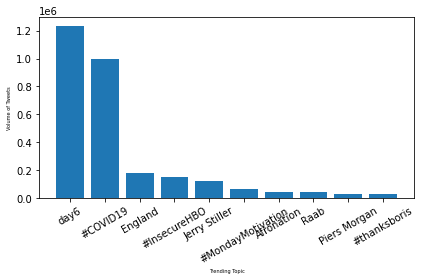

In [0]:
#bar chart example code. Plots from the 
plt.bar(df2.name, df2.tweet_volume)
plt.xlabel('Trending Topic', fontsize=5)
plt.ylabel('Volume of Tweets', fontsize=5)
plt.xticks(fontsize=10, rotation=30)
plt.tight_layout()


plt.savefig('TweetVolume.jpeg')
plt.show()

In [0]:
#Tweet Analysis. Adds more in-depth dataframe construction and new search command for API. 

class Client():
    def __init__(self, twitter_user=None):
        self.auth = Authenticator().authenticate_twitter_app()
        self.Client = API(self.auth)

        self.twitter_user = twitter_user

    def get_Client_api(self):
        return self.Client

class Authenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
        return auth

class Analyser():

    def clean_tweet(self, tweet):
        tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
        tokens = word_tokenize(tweet)
        tokens = [w.lower() for w in tokens]
        table = str.maketrans('','', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words]
        porter = PorterStemmer()
        words = [porter.stem(word) for word in words]
        tweet = ' '.join(word for word in words)

        return tweet

#Returns the analysis into a categorised data frame. 

    def tweets_to_data_frame(self, tweets):

        tweet_df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])
        tweet_df['user']= [tweet.user.screen_name for tweet in tweets]
        tweet_df['text']= [tweet.text for tweet in tweets]
        tweet_df['created_at']= [tweet.created_at for tweet in tweets]
        tweet_df['fav_c']= [tweet.favorite_count for tweet in tweets]
        tweet_df['ret_c']= [tweet.retweet_count for tweet in tweets]
        tweet_df['location']= [tweet.user.location for tweet in tweets]
        tweet_df['source']= [tweet.source for tweet in tweets]

        return tweet_df


if __name__ == '__main__':
    twitter_client = Client()
    tweet_analyser = Analyser()

    api = twitter_client.get_Client_api()

#Tweets is changed. Now searches the API for key terms with paramaters. Paramaters are available in the tweepy package. 
#The popular result_type returns a maximum of 15 results. 
    tweets = api.search(q="Little Richard", lang="en", count=100, result_type = "popular")

    df = tweet_analyser.tweets_to_data_frame(tweets)

    print(df)


x = df.sort_values(by = 'created_at', ascending = True)
x
#value_counts counts the values in each row. In this case how many of each source value exist.
#x = df['source'].value_counts()
#x


                                               tweets  ...                source
0   I just heard the news about Little Richard and...  ...       Twitter Web App
1   From 'Tutti Frutti' to 'Long Tall Sally' to 'G...  ...       Twitter Web App
2   I served soul food brunch to Little Richard ev...  ...    Twitter for iPhone
3   A night to remember  little Richard. And the b...  ...    Twitter for iPhone
4   RIP Little Richard - the architect of rock ‘n’...  ...    Twitter for iPhone
5          Little Richard RIP https://t.co/HU3erfK6S3  ...       Twitter Web App
6   James Brown got his big break as a Little Rich...  ...    Twitter for iPhone
7   Little Richard was a great talent and a big pa...  ...       Twitter Web App
8   With his exuberance, his creativity, and his r...  ...       Twitter Web App
9   Little Richard (1932-2020) consenting to pose ...  ...      Twitter for iPad
10  Rest In Peace To One Of The True Creators Of R...  ...       Twitter Web App
11  The legendary Little Ric

,tweets,user,text,created_at,fav_c,ret_c,location,source
9,Little Richard (1932-2020) consenting to pose ...,BeschlossDC,Little Richard (1932-2020) consenting to pose ...,2020-05-09 14:33:22,63644,12245,PRESIDENTS OF WAR:,Twitter for iPad
6,James Brown got his big break as a Little Rich...,anildash,James Brown got his big break as a Little Rich...,2020-05-09 15:28:40,42615,10717,NYC,Twitter for iPhone
10,Rest In Peace To One Of The True Creators Of R...,SpikeLeeJoint,Rest In Peace To One Of The True Creators Of R...,2020-05-09 15:48:50,33772,9987,,Twitter Web App
2,I served soul food brunch to Little Richard ev...,ava,I served soul food brunch to Little Richard ev...,2020-05-09 16:11:17,168594,17209,Fourth World,Twitter for iPhone
12,"""Self-proclaimed"" implies that this title was ...",marclamonthill,"""Self-proclaimed"" implies that this title was ...",2020-05-09 16:25:04,15826,3739,ORDER MY NEW BOOK!!!!,Twitter Web App
8,"With his exuberance, his creativity, and his r...",MichelleObama,"With his exuberance, his creativity, and his r...",2020-05-09 17:30:24,58877,5377,"Washington, DC",Twitter Web App
3,A night to remember little Richard. And the b...,ringostarrmusic,A night to remember little Richard. And the b...,2020-05-09 18:07:21,32329,4938,,Twitter for iPhone
13,"Little Richard has died, aged 87. BBC Archive ...",BBCArchive,"Little Richard has died, aged 87. BBC Archive ...",2020-05-09 20:32:11,4559,1639,London,Twitter Media Studio
0,I just heard the news about Little Richard and...,bobdylan,I just heard the news about Little Richard and...,2020-05-09 20:45:05,157227,21208,,Twitter Web App
5,Little Richard RIP https://t.co/HU3erfK6S3,thebeatles,Little Richard RIP https://t.co/HU3erfK6S3,2020-05-09 23:13:04,22000,4132,,Twitter Web App


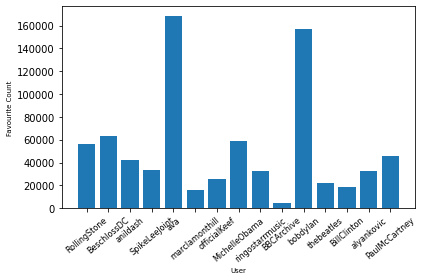

In [0]:
#Example bar chart code. 
plt.bar(x.user, x.fav_c)
plt.xlabel('User', fontsize=7)
plt.ylabel('Favourite Count', fontsize=7)
plt.xticks(fontsize=8, rotation=40)
#plt.tight ensures the figure remains in full for export.
plt.tight_layout()


plt.savefig('TopTweetsLittleRichard.jpeg')
plt.show()

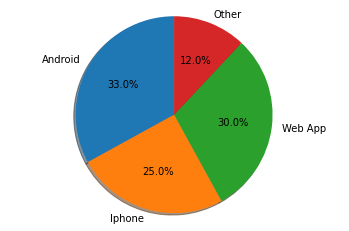

In [0]:
#Example Pie Chart Code. Values gained from values_count()
labels = ('Android','Iphone','Web App','Other')
sizes = (33,25,30,12)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct ='%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal') 


plt.savefig('EUROPESources.png')
plt.show()

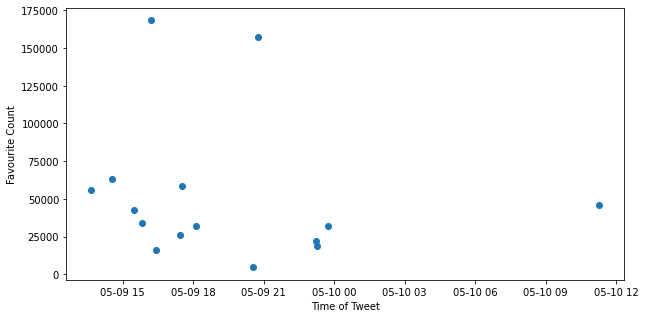

<Figure size 432x288 with 0 Axes>

In [0]:
#Scatter plot comparing time posted with favourite count for popular tweets.
plt.figure(figsize=[10,5])
plt.scatter(x.created_at, x.fav_c)
plt.xlabel('Time of Tweet')
plt.ylabel('Favourite Count')
plt.show()

plt.savefig("TimeofTweetLittleRichard")

In [0]:
#Sentiment Analysis Framework. Analyse_sentiment function included for textblob and Vader. 
#To use code comment out one function.

class Client():
    def __init__(self, twitter_user=None):
        self.auth = Authenticator().authenticate_twitter_app()
        self.Client = API(self.auth)

        self.twitter_user = twitter_user

    def get_Client_api(self):
        return self.Client

class Authenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
        return auth

class Analyser():

    def clean_tweet(self, tweet):
        tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
        tokens = word_tokenize(tweet)
        tokens = [w.lower() for w in tokens]
        table = str.maketrans('','', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words]
        porter = PorterStemmer()
        words = [porter.stem(word) for word in words]
        tweet = ' '.join(word for word in words)

        return tweet

#analyse_sentiment using the Vader package. Values after each pol_score can be changed to
#affect which results designated positive, negative or neutral.

    def analyse_sentiment(self, tweet):
        sia = SIA()
        pol_score = sia.polarity_scores(tweet)
        if(pol_score['compound']>0.2):
          sentiment = 1
        elif(pol_score['compound']< -0.2):
          sentiment = -1
        else:
          sentiment = 0
        return sentiment
#TextBlob analysis commented out. Comment in if want TextBlob analysis
    #   def analyze_sentiment(self, tweet):
     #   analysis = TextBlob(self.clean_tweet(tweet))

      #  if analysis.sentiment.polarity > 0:
       #     return 1
      #  elif analysis.sentiment.polarity < 0:
      #      return -1
     #   else:
        #    return 0

#Returns the analysis into a categorised data frame. 

    def tweets_to_data_frame(self, tweets):

      tweet_df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])
      tweet_df['user']= [tweet.user.screen_name for tweet in tweets]
      tweet_df['text']= [tweet.text for tweet in tweets]
      tweet_df['created_at']= [tweet.created_at for tweet in tweets]
      tweet_df['fav_c']= [tweet.favorite_count for tweet in tweets]
      tweet_df['ret_c']= [tweet.retweet_count for tweet in tweets]
      tweet_df['location']= [tweet.user.location for tweet in tweets]
      tweet_df['source']= [tweet.source for tweet in tweets]
      
      return tweet_df


if __name__ == '__main__':
    twitter_client = Client()
    tweet_analyser = Analyser()

    api = twitter_client.get_Client_api()

#Tweets is changed. Now searches the API for key terms with paramaters. 

    tweets = api.search(q="Little Richard", lang="en", count=100, result_type = "popular")

    df = tweet_analyser.tweets_to_data_frame(tweets)
    df['sentiment'] = np.array([tweet_analyser.analyse_sentiment(tweet) for tweet in df['tweets']])


#Counts the total number in each sentiment category and returns as percentages. 
x = df['sentiment'].value_counts(-1)
x

 1    0.400000
-1    0.333333
 0    0.266667
Name: sentiment, dtype: float64

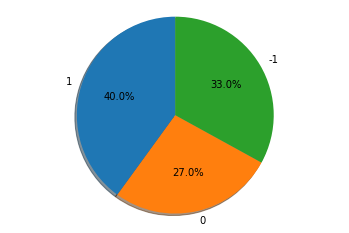

In [0]:
#Example of Pie Chart used for Sentiment Analysis
labels = ("1","0", "-1")
sizes = (0.40, 0.27,0.33 )

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct ='%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal') 

plt.savefig('LittleRichardPie.png')
plt.show()